# Dataset demographic bias metrics

This package implements several metrics for dataset demographic bias. The 
metrics are organized as follows:

* Representational bias metrics
* Stereotypical bias metrics at the global level
* Stereotypical bias metrics at the local level
* Some visualization tools

## Including the libraries

In [1]:
import pandas as pd
import os

import dataset_bias_metrics as dbm

## Loading example datasets

These .csv files correspond to the datasets analyzed in the paper. Only the demographic data with no identifying information is provided, and the rows are scrambled to avoid the identification of specific samples.

In [2]:
datasets = {}
for filename in os.listdir('example_data'):
    if filename.endswith(".csv"):
        ds = pd.read_csv(os.path.join('example_data', filename))
        datasets[filename.split('.')[0]] = ds
    
display(datasets['raf-db2'])

,age,race,gender,label
0,20-29,Indian,Male,disgust
1,20-29,White,Male,disgust
2,30-39,White,Male,angry
3,60-69,Southeast Asian,Female,happy
4,40-49,East Asian,Male,neutral
...,...,...,...,...
15121,30-39,White,Male,sad
15122,30-39,East Asian,Male,happy
15123,20-29,Black,Male,fear
15124,30-39,White,Female,happy


## Representational bias

The package includes three dictionaries with the representational metrics: one with all the metrics, one with the metrics adapted to bias measurement, and one with the metrics adapted to diversity measurement.

'Age component'

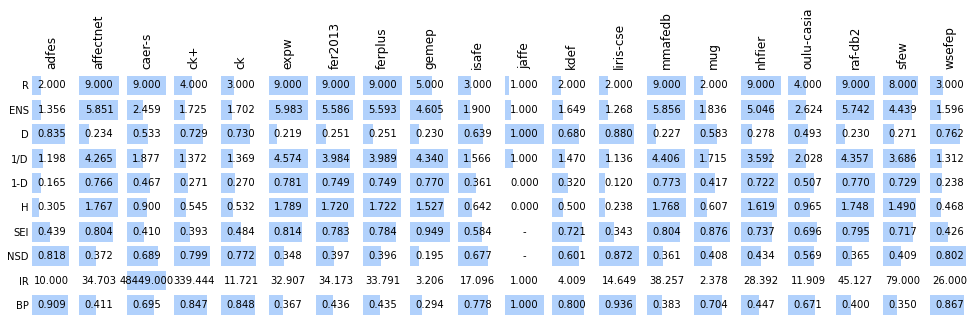

'Race component'

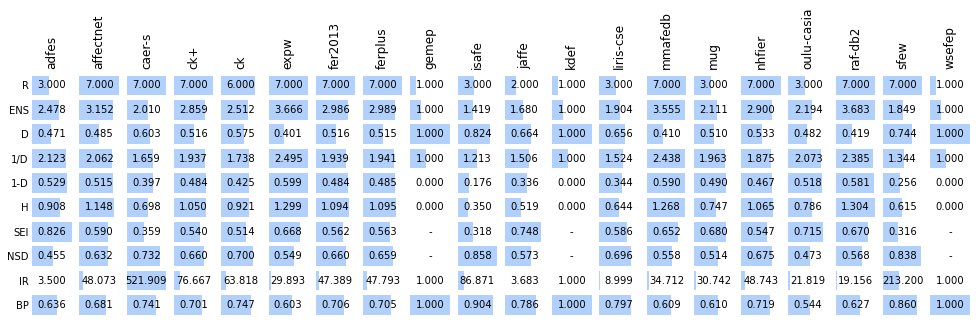

'Gender component'

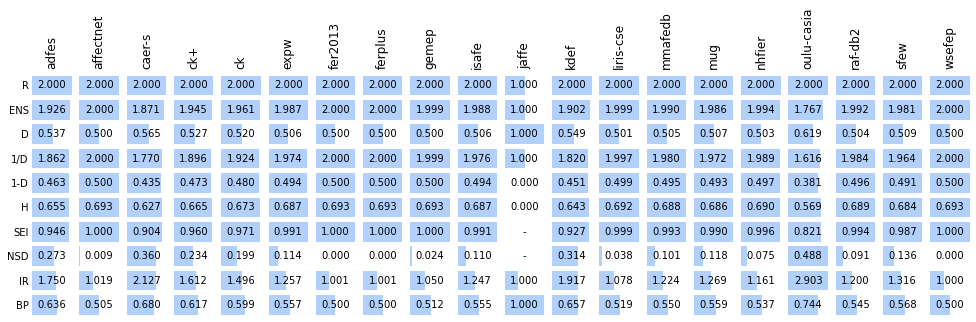

In [3]:
for component in ['age', 'race', 'gender']:
    repbias = pd.DataFrame(0, 
                           index=datasets.keys(), 
                           columns=dbm.representational.metrics.keys())

    for dsname, ds in datasets.items():
        for metricname, m in dbm.representational.metrics.items():
            repbias.loc[dsname, metricname] = m(ds, component)

    display(f'{component.capitalize()} component')
    dbm.visualization.plotTable(repbias.T, normalizeAxis=1, sort=None)

'Age component'

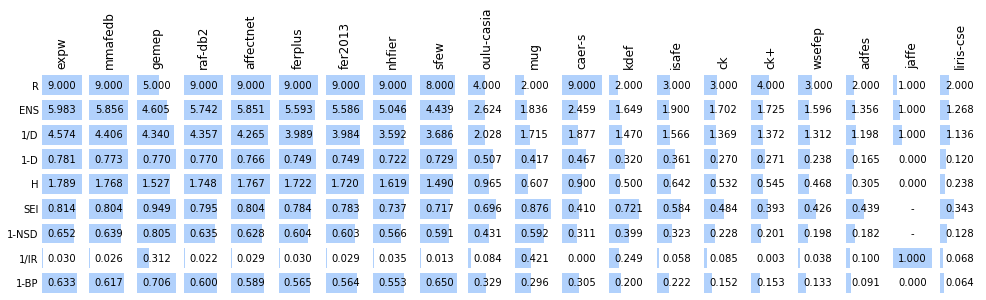

'Race component'

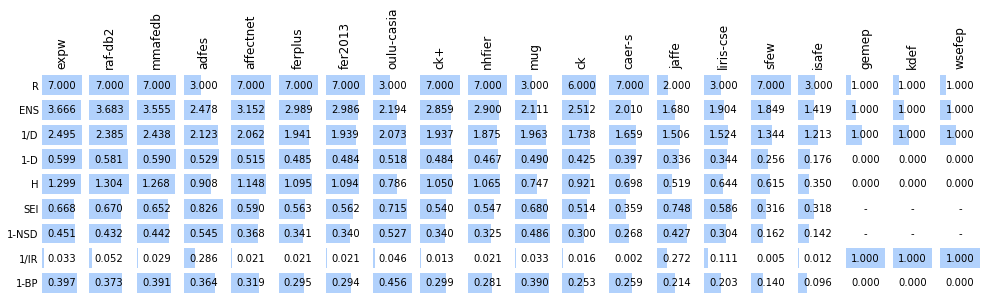

'Gender component'

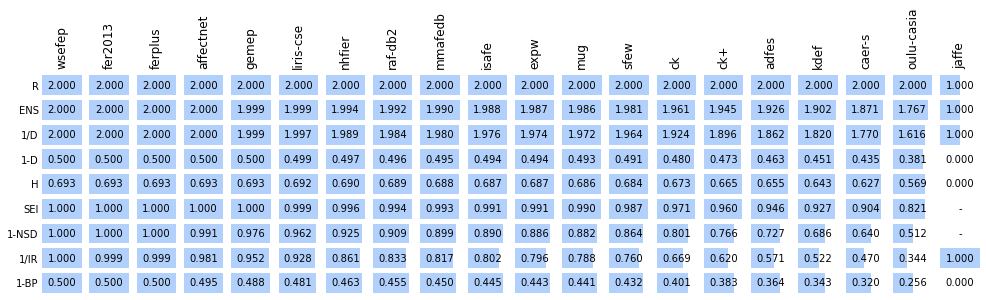

In [4]:
for component in ['age', 'race', 'gender']:
    repbias = pd.DataFrame(0, 
                           index=datasets.keys(), 
                           columns=dbm.representational.metrics_as_diversity.keys())

    for dsname, ds in datasets.items():
        for metricname, m in dbm.representational.metrics_as_diversity.items():
            repbias.loc[dsname, metricname] = m(ds, component)

    display(f'{component.capitalize()} component')
    dbm.visualization.plotTable(repbias.T, normalizeAxis=1, sort='descending')

'Age component'

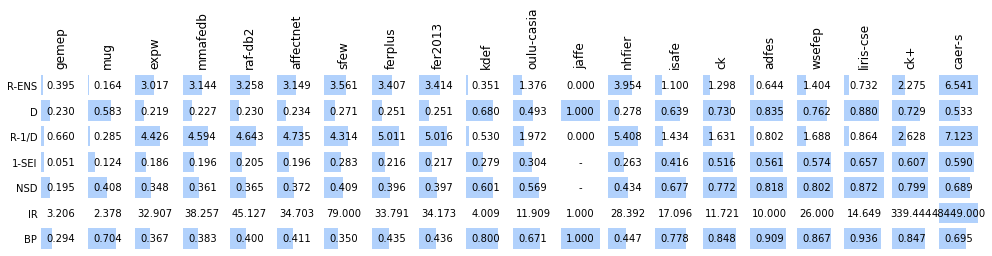

'Race component'

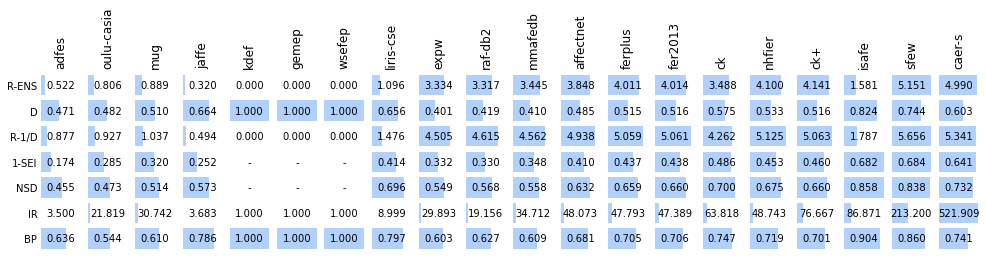

'Gender component'

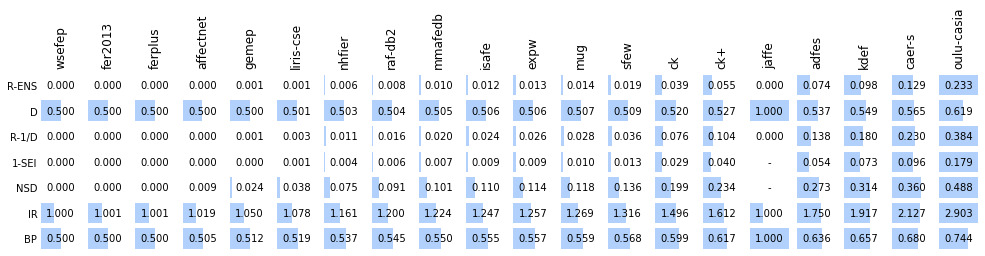

In [5]:
for component in ['age', 'race', 'gender']:
    repbias = pd.DataFrame(0, 
                           index=datasets.keys(), 
                           columns=dbm.representational.metrics_as_bias.keys())

    for dsname, ds in datasets.items():
        for metricname, m in dbm.representational.metrics_as_bias.items():
            repbias.loc[dsname, metricname] = m(ds, component)

    display(f'{component.capitalize()} component')
    dbm.visualization.plotTable(repbias.T, normalizeAxis=1, sort='ascending')

The following is an example of representational bias measurement in a combined demographic component, which considers the whole combinatory of the base components.

'Combined Age-Race-Gender component'

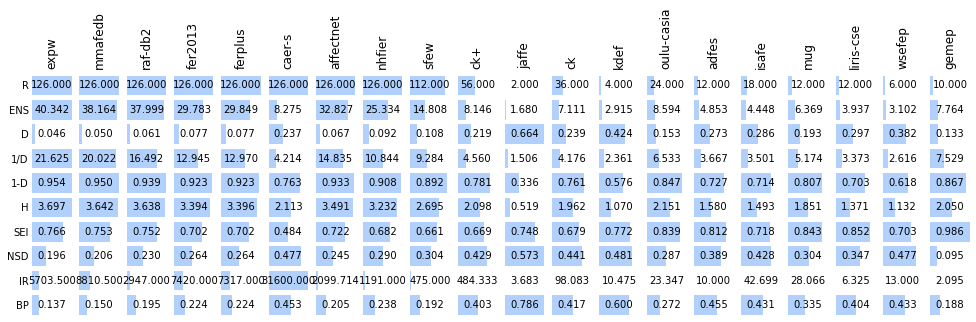

In [6]:
component = ['age', 'race', 'gender']
repbias = pd.DataFrame(0, 
                       index=datasets.keys(), 
                       columns=dbm.representational.metrics.keys())

for dsname, ds in datasets.items():
    for metricname, m in dbm.representational.metrics.items():
        repbias.loc[dsname, metricname] = m(ds, component)

display(f'Combined Age-Race-Gender component')
dbm.visualization.plotTable(repbias.T, normalizeAxis=1, sort='descending')

## Stereotypical bias (global)

The following is an example of the application of the global stereotypical bias metrics

'Age-Label components'

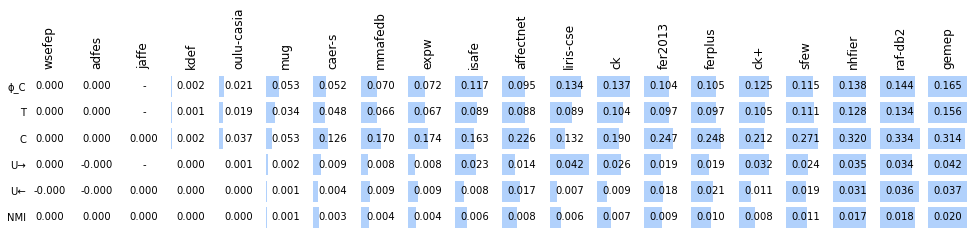

'Race-Label components'

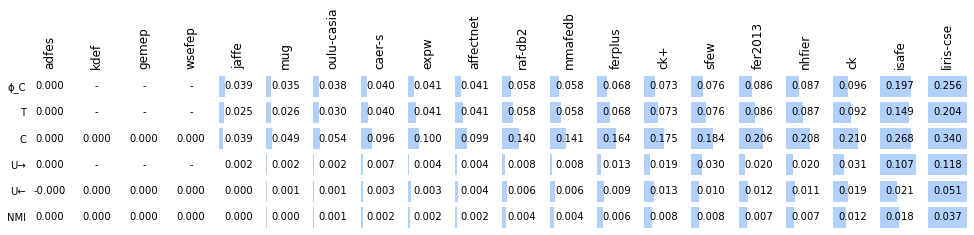

'Gender-Label components'

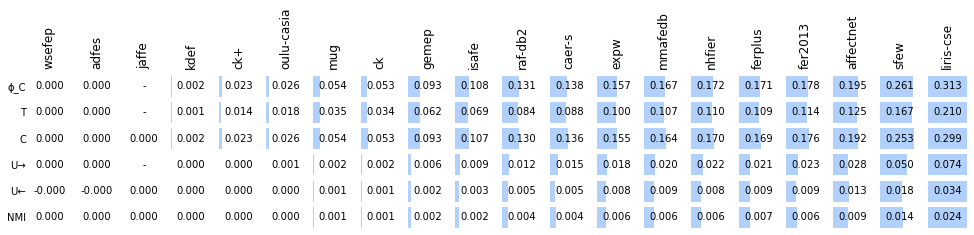

In [7]:
for c1, c2 in [('age', 'label'), ('race', 'label'), ('gender', 'label')]:
    stereobias = pd.DataFrame(0, 
                              index=datasets.keys(), 
                              columns=dbm.stereotypical.metrics.keys())

    for dsname, ds in datasets.items():
        for metricname, m in dbm.stereotypical.metrics.items():
            stereobias.loc[dsname, metricname] = m(ds, c1, c2)

    display(f'{c1.capitalize()}-{c2.capitalize()} components')
    dbm.visualization.plotTable(stereobias.T, normalizeAxis=1)

## Stereotypical bias (local)

The following is an example of the application of the local stereotypical bias metrics

'Label-Age components, NPMI'

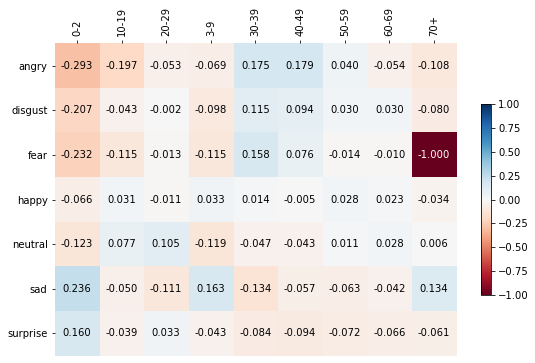

"Label-Age components, Ducher's Z"

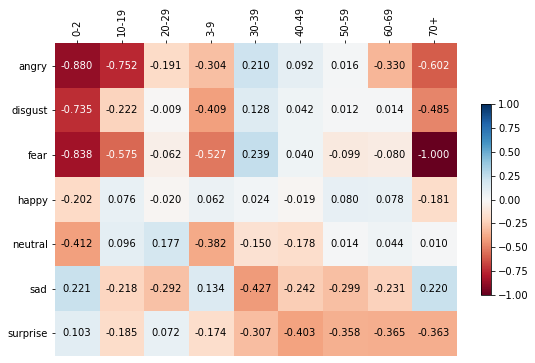

"Label-Age components, Lewonstin's D"

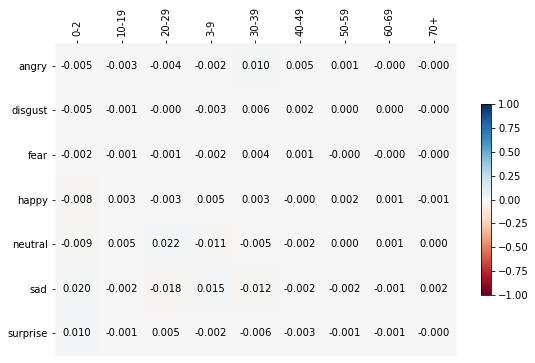

'Label-Race components, NPMI'

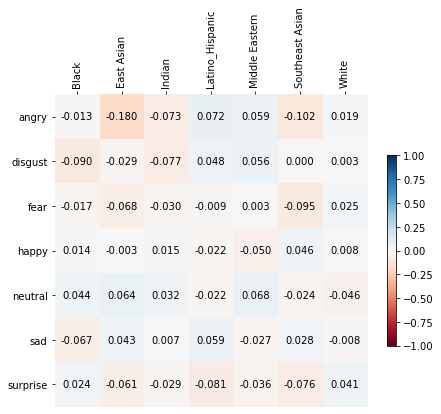

"Label-Race components, Ducher's Z"

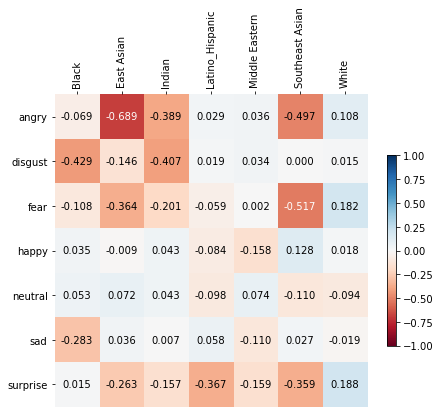

"Label-Race components, Lewonstin's D"

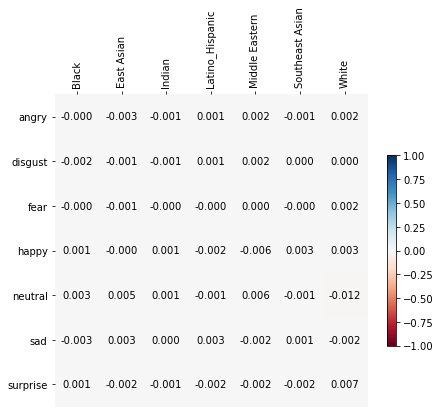

'Label-Gender components, NPMI'

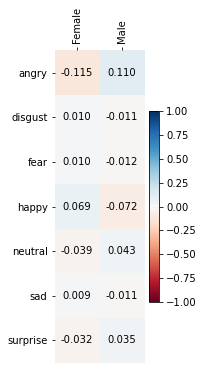

"Label-Gender components, Ducher's Z"

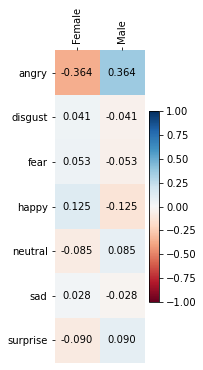

"Label-Gender components, Lewonstin's D"

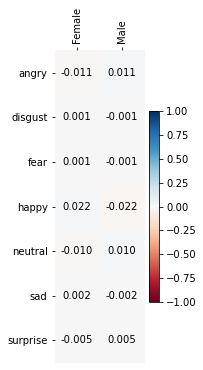

In [8]:
components = [['label', 'age'],
             ['label', 'race'],
             ['label', 'gender']]

ds = datasets['raf-db2']
for c1, c2 in components:
    for metricname, m in dbm.local_stereotypical.metrics.items():
        matrix = m(ds, c1, c2)
        
        display(f'{c1.capitalize()}-{c2.capitalize()} components, {metricname}')
        dbm.visualization.plotMatrix(matrix)